## Implementing a Neural Network from Scratch in Python

In this notebook, I'll be implementing a 3-layer Neural Network from scratch using python. This can be a valuable exercise because it lets you understand how neural networks work which can be essential for designing effective models. This is a binary classification problem in which we classify whether a given sample is $0$ or $1$, i.e, **negative class** or **positive class** respectively.

Note that the process and code described over here aren't terribly efficient. But, it lets you to understand about various **algorithms** and **optimization techniques** 

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegressionCV
## setting random seed and default size
np.random.seed(42)
matplotlib.rcParams['figure.figsize'] = (10.0,8.0)
%matplotlib inline

### Generating Dataset

Text(0, 0.5, 'X1')

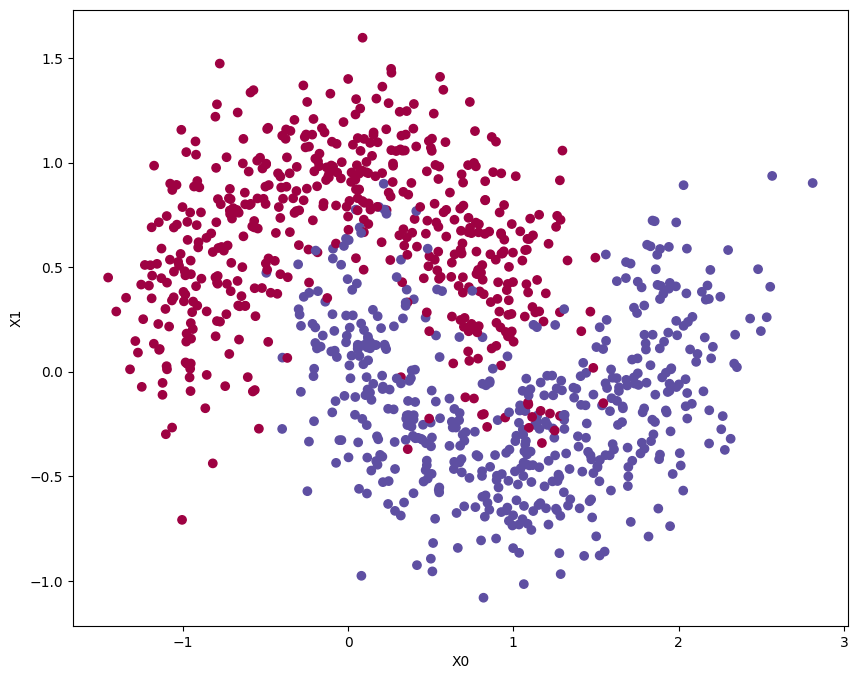

In [13]:
X,y = make_moons(1000,noise=0.25) 
plt.scatter(X[:,0],X[:,1],c = y,cmap = plt.cm.Spectral)
plt.xlabel("X0")
plt.ylabel("X1")

The dataset we have obtained from `make_moons()` function has two classes, namely `red` and `blue` points. You can think of `X0` and `X1` as two measurements and `red` and `blue` are two classes.

#### Goal:

Train a Classification Algorithm (such as Logistic Regression) and a Neural Network to classify the `red` and `blue` classes and distinguish the performance of both by using decision boundary.

### Logistic Regression

To demonstrate the classification algorithm performance, Let's use Logistic Regression to train the above data

In [16]:
clf = LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV()

In [25]:
### Function to plot decision boundary to understand about positive and negative class
def plot_decision_boundary(clf,X,y):
    # set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


Text(0.5, 1.0, 'LogisticRegression')

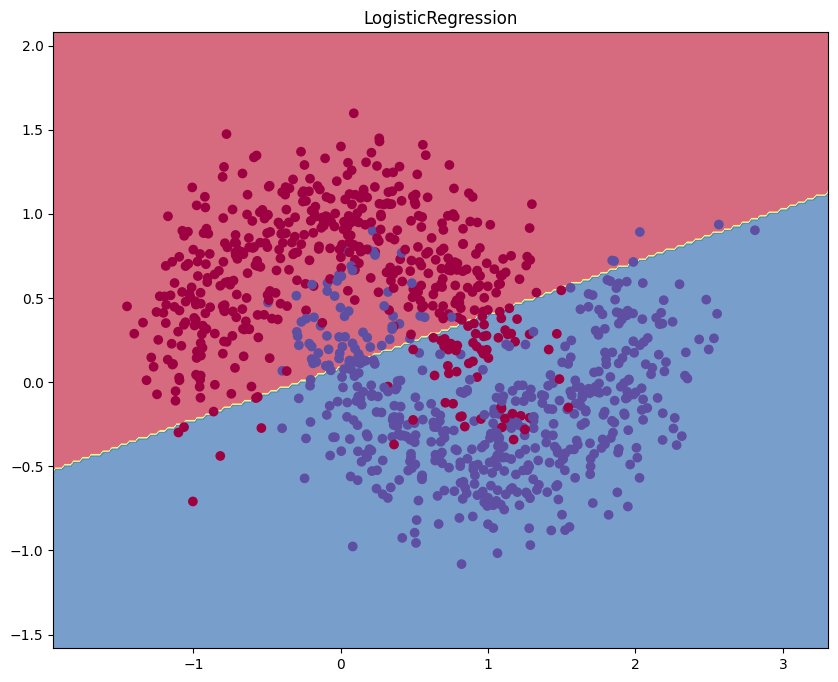

In [27]:
plot_decision_boundary(clf,X,y)
plt.title("LogisticRegression")

The above graph shows the decision boundary learned by our Logistic Regression Classifier. The fit is as good as with straight line but it's uncapable to capture the **moon shape** of our data. 

### Training a Neural Network

Let's now try to build a 3-layer Neural Network with one input layer, one hidden layer and one output layer. The number of nodes in input layer and output layer depends on the shape of input data and output data respectively. The input to the network consists of `X[:,0]` and `X[:,1]` numpy arrays and output from the network consists of an array of shape like `y[:,0]`. Number of nodes in the hidden layer is a hyperparameter and can be chosen upon our wish.

- Number of nodes in hidden layer and number of hidden layers : Hyperparameter
- Activation Function: Sigmoid (here), can be anyone from the set of activation functions ${ReLU, TanH, sigmoid}$
- Optimization Method: Stochastic Gradient Descent, can apply anything from ${SGD, BGD, mini BGD, Adam}$
- Loss Function: Logistic Loss $L(y, y') = -\frac{1}{N} \sum_{n \in N} \sum_{i \in C} y_{n,i} \log y_{n,i}^{'}$ 